# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [84]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\aliap\Cornell\BEE 4750\hw1-AAPShabazz`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [85]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [86]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [87]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

**PROBLEM 1.1 SOLUTION:**

The provided solution erroneously sets min_value = 0 at the start, which is less than all the array values (not included in them). Therefore, the min_value will never be changed to a value that is actually in the provided array.

In [88]:
# 1.1 Solution

function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

# Assinging min_value to any real value in the array would fix the code. I selected the first index.

minimum(array_values) = 0
minimum(array_values) = 78


78

Assinging min_value to any real value in the array would fix the code. I selected the first index.

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [89]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


**PROBLEM 1.2 SOLUTION:**

It is not 100% clear what the author was trying to do. But, it appears that they failed to actually call the function and set the resultant value to average_grade. At the moment, average_grade is only local to the function definition. Also, the Statistics package is not properly utilized.

In [90]:
# 1.2 Solution

using Statistics

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

average_grade = class_average(student_grades)

@show average_grade;

# The above is a minimal solution but not good coding practice as the function only works for the specific imput given.
# Below is better:

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

average_grade1 = class_average(student_grades)

@show average_grade1;

average_grade = 94.4
average_grade1 = 94.4


I made the function callable by appropriately managing variable scopes.

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [91]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

**PROBLEM 1.3 SOLUTION:**

The author set outcomes as the number zero rather than an array of n_trials units, each of which is 0. I rectified this.

In [92]:
# 1.3 Solution:

function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) # Used the zeros function ratehr than zero
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.
    


**PROBLEM 2 SOLUTION**

mystery_function aims to create a copy of an array, excluding duplicate values. The function union yields a similar result.

In [93]:
# 2 Solution:

function mystery_function(values)
    y = [] # Sets the array that is to become the copy as empty.
    for v in values # Iterates through all values in the imputted array.
        if !(v in y) # Add a value to y from v on the condition that the value is not already in y.
            append!(y, v)
        end
    end
    return y # Output y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);
@show Array{Any}(union(list_of_values)); #Used the union function and created an array of type Any.

mystery_function(list_of_values) = Any[1, 2, 3, 4]
Array{Any}(union(list_of_values)) = Any[1, 2, 3, 4]


I used the union function and casted to type Any for consistency.


### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


**PROBLEM 3 SOLUTION:**

In [133]:
# 3 Solution:

function compute_mean(v)
    sum = 0
    for el in v
        sum += el
    end
    return sum/length(v)
end

random_vect = rand(1:10,10)
result =  broadcast(+, -1*compute_mean(random_vect), random_vect)
result = round.(result,digits = 3) # Rounded because of machine precision
@show result
@show round.(mean(result))

result = [-1.3, 0.7, 2.7, 3.7, 0.7, -5.3, 2.7, -2.3, -3.3, 1.7]
round.(mean(result)) = 0.0


0.0

Created function and used broadcast function as instructed. Rounded values in the random-valued vector to avoid issues related to machine precision. Verified that the mean of the deviations is 0, as expected.


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

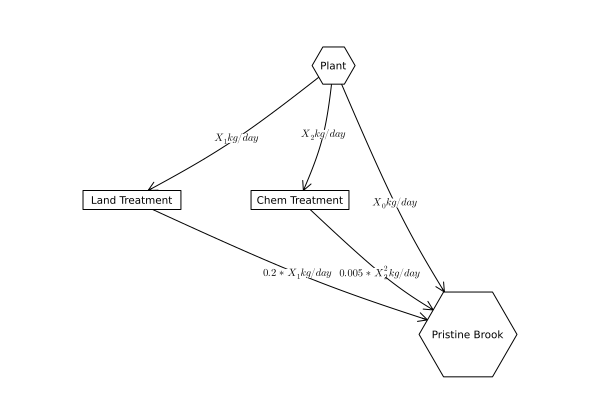

In [95]:
using Plots
using LaTeXStrings

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1 kg/day", (1,3) => L"X_2 kg/day", (1, 4) => L"X_0 kg/day",(2, 4) => L"0.2*X_1 kg/day",(3, 4) => L"0.005*X_2^{2} kg/day")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?



**PROBLEM 4 SOLUTION:**

Note: Values for $kg$ and $m^3$ will be conflated because the concentration is 1
- Method 1 Effluent ($kg/day$ or $m^3/day$):   $1-0.8*X_1 = 0.2*X_1$
- Method 1 Cost ($dollars/day$):   $X_1^{2}/20$
- Method 2 Effluent ($kg/day$ or $m^3/day$):   $(1-(1-0.005*X_2))*X_2 = 0.005*X_2^{2}$
- Method 2 Cost ($dollars/day$):   $1.50*X_2$
- Assuming all effluent is treated: $X_1 + X_2 \leq X$ where $X$ is the full discharge (100)
- If some effluent is untreated: $X_1 + X_2 + X_0 \leq X$ where $X_0$ is untreated (dumped)



min_cost = 240.0


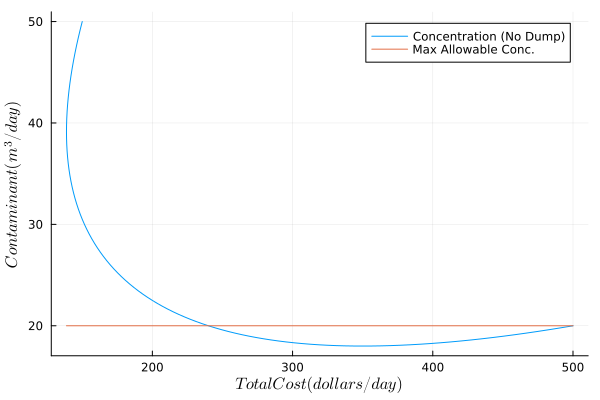

In [242]:
# 4 Solution:

using Plots
using LaTeXStrings

function meth1(x1)
    conc1 = 0.2*x1
    cost1 = x1^2/20
    return (conc1,cost1)
end

function meth2(x2)
    conc2 = 0.005*x2^2
    cost2 = 1.5*x2  
    return (conc2,cost2)
end

# PLAN 0: SET DUMPING to 0 kg/day

x1conc = [0:100]
fintotconc = zeros(101)
totcost = zeros(101)
i = 1
for x1 in 0:100
    p1 = meth1(x1)
    p2 = meth2(100-x1)
    fintotconc[i] = p1[1] + p2[1]
    totcost[i] = p1[2] + p2[2]
    i += 1
end
ind = findfirst(isequal(20), fintotconc)
min_cost = totcost[ind]
@show min_cost
plot(totcost,[fintotconc 20*ones(101)],ylabel = L"Contaminant (m^3/day)", xlabel = L"Total Cost (dollars/day)", label = ["Concentration (No Dump)" "Max Allowable Conc."])


min_cost = 257.3


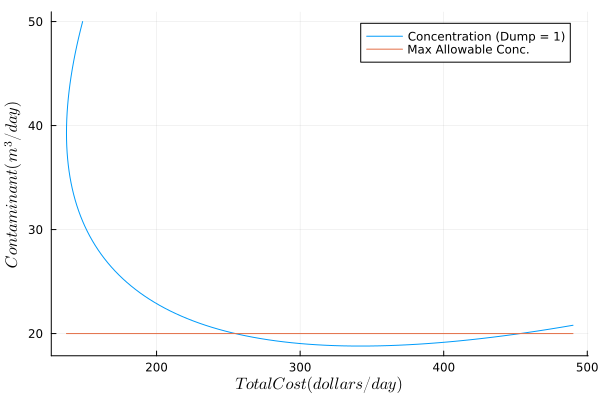

In [246]:

# PLAN 1: SET DUMPING to 1 kg/day

x1conc = [0:99]
fintotconc = zeros(100)
totcost = zeros(100)
i = 1
for x1 in 0:99
    p1 = meth1(x1)
    p2 = meth2(99-x1)
    fintotconc[i] = p1[1] + p2[1] + 1
    totcost[i] = p1[2] + p2[2]
    i += 1
end
ind = findfirst(isequal(19.925), fintotconc)
min_cost = totcost[ind]
@show min_cost
plot(totcost,[fintotconc 20*ones(100)],ylabel = L"Contaminant (m^3/day)", xlabel = L"Total Cost (dollars/day)", label = ["Concentration (Dump = 1)" "Max Allowable Conc."])


min_cost = 287.0


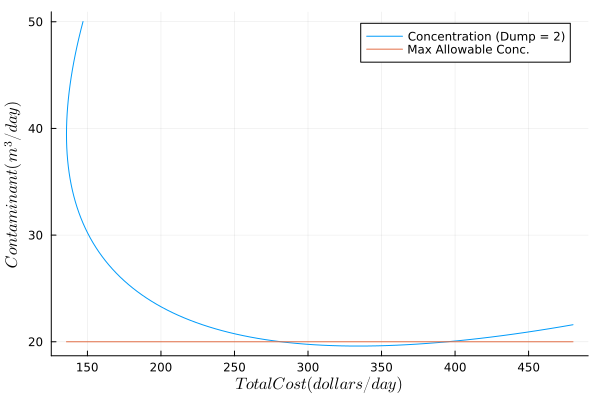

In [239]:

# PLAN 2: SET DUMPING to 2 kg/day

x1conc = [0:98]
fintotconc = zeros(99)
totcost = zeros(99)
i = 1
for x1 in 0:98
    p1 = meth1(x1)
    p2 = meth2(98-x1)
    fintotconc[i] = p1[1] + p2[1] + 2
    totcost[i] = p1[2] + p2[2]
    i += 1
end
ind = findfirst(isequal(19.92), fintotconc)
min_cost = totcost[ind]
@show min_cost
plot(totcost,[fintotconc 20*ones(99)],ylabel = L"Contaminant (m^3/day)", xlabel = L"Total Cost (dollars/day)", label = ["Concentration (Dump = 2)" "Max Allowable Conc."])


The above scenarios were broken down into three plans where 0,1, and 2 kg/day are dumped in the effluent, respectively. Graphs were made with multiple possible input combinations (e.g., (2,98), (45,55), etc.) in $kg$ or $m^3$ per day of the two methods mentioned in the problem statement. Only whole number inputs $X_n$ were considered. For "Plan 0," the lowest allowable cost was $240 for 20 kg/day in the effluent. For "Plan 1," it was $257.3 for 19.925 kg/day. For "Plan 2," it was $287 for 19.92 kg/day. These results indicate that there would be no upside to dumping at all. If a more accurate solution exists, multivariate optimization with sub-integer precision is necessary.


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.